# Pandas II: Data Operation

*Disclaimer: The contents of this notebook are developped according to Python Data Science Handbook, by Jake VanderPlas and Python for Data Analysis, by Wes McKinney*

In [3]:
import numpy as np
import pandas as pd

### Operating on Data in Pandas
One of the essential pieces of NumPy is the ability to perform quick element-wise operations, both with basic arithmetic (addition, subtraction, multiplication, etc.) and with more sophisticated operations (trigonometric functions, exponential and logarithmic functions, etc.). Pandas inherits much of this functionality from NumPy, and the ufuncs that we introduced in the NumPy chapter.

Pandas includes a couple useful twists, however: for unary operations like negation and trigonometric functions, these ufuncs will **preserve index and column labels in the output**, and for binary operations such as addition and multiplication, Pandas will automatically **align indices** when passing the objects to the ufunc.

### Ufuncs: Index Preservation
Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas `Series` and `DataFrame` objects. 

In [4]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [5]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)), columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


If we apply a NumPy ufunc on either of these objects, the result will be another Pandas object with the **indices preserved**

In [6]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [7]:
ser[ser < 5]

1    3
3    4
dtype: int32

In [8]:
ser * 2

0    12
1     6
2    14
3     8
dtype: int32

In [9]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### UFuncs: Index Alignment
For binary operations on two `Series` or `DataFrame` objects, Pandas will align indices in the process of performing the operation. When you are performing arithmetic operations on two Pandas objects, if any index pairs are not the same, the respective index in the result will be the union of the index pairs 

#### Index Alignment in `Series`
As an example, suppose we are combining two different data sources, and find only the top three US states by area and the top three US states by population

In [10]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [11]:
area

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64

In [12]:
population

California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64

In [13]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

The resulting array contains the union of indices of the two input arrays, which could be determined using standard Python set arithmetic on these indices. Any item for which one or the other does not have an entry is marked with `NaN`, or "Not a Number," which is how Pandas marks missing data. This index matching is implemented this way for any of Python's built-in arithmetic expressions; any missing values are filled in with `NaN` by default

In [14]:
area.index | population.index

C:\Users\sailu\AppData\Local\Temp/ipykernel_18056/3572280633.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  area.index | population.index


Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [15]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])

In [16]:
A

0    2
1    4
2    6
dtype: int64

In [17]:
B

1    1
2    3
3    5
dtype: int64

In [18]:
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

If using `NaN` values is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators. For example, calling `A.add(B)` is equivalent to calling `A + B`, but allows optional explicit specification of the fill value for any elements in `A` or `B` that might be missing

In [19]:
A.add(B, fill_value = 0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

#### Index Alignment in `DataFrame`
A similar type of alignment takes place for **both columns and indices** when performing operations on DataFrames

In [20]:
rng = np.random.RandomState(42)
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns = list('AB'))
A

,A,B
0,6,19
1,14,10


In [21]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns = list('BAC'))
B

,B,A,C
0,7,4,6
1,9,2,6
2,7,4,3


In [22]:
A + B

,A,B,C
0,10.0,26.0,NaN
1,16.0,19.0,NaN
2,NaN,NaN,NaN


Notice that indices are **aligned** correctly irrespective of their order in the two objects, and indices in the result are **sorted**. As was the case with `Series`, we can use the associated object's arithmetic method and pass any desired fill_value to be used in place of missing entries. Here we'll fill with the mean of all values in `A` (computed by first stacking the rows of `A`)

In [23]:
A.stack()

0  A     6
   B    19
1  A    14
   B    10
dtype: int32

In [24]:
fill = A.stack().mean()
A.add(B, fill_value = fill)

,A,B,C
0,10.00,26.00,18.25
1,16.00,19.00,18.25
2,16.25,19.25,15.25


#### Mapping Between Python Operators and Pandas Methods

<div>
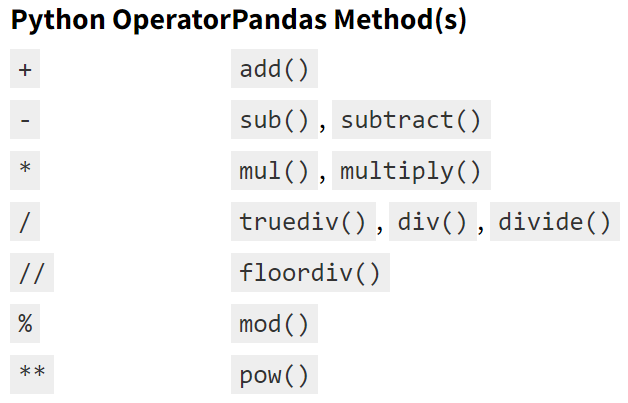
</div>

### Ufuncs: Operations Between `DataFrame` and `Series`
When performing operations between a `DataFrame` and a `Series`, the index and column alignment is similarly maintained. Operations between a `DataFrame` and a `Series` are similar to operations between a two-dimensional and one-dimensional NumPy `array`.

In [25]:
A = rng.randint(10, size = (3, 4))
A

array([[7, 7, 2, 5],
       [4, 1, 7, 5],
       [1, 4, 0, 9]])

In [26]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-3, -6,  5,  0],
       [-6, -3, -2,  4]])

According to NumPy's broadcasting rules, subtraction between a two-dimensional array and one of its rows is **applied row-wise**

In Pandas, the convention similarly operates **row-wise by default**

<div>
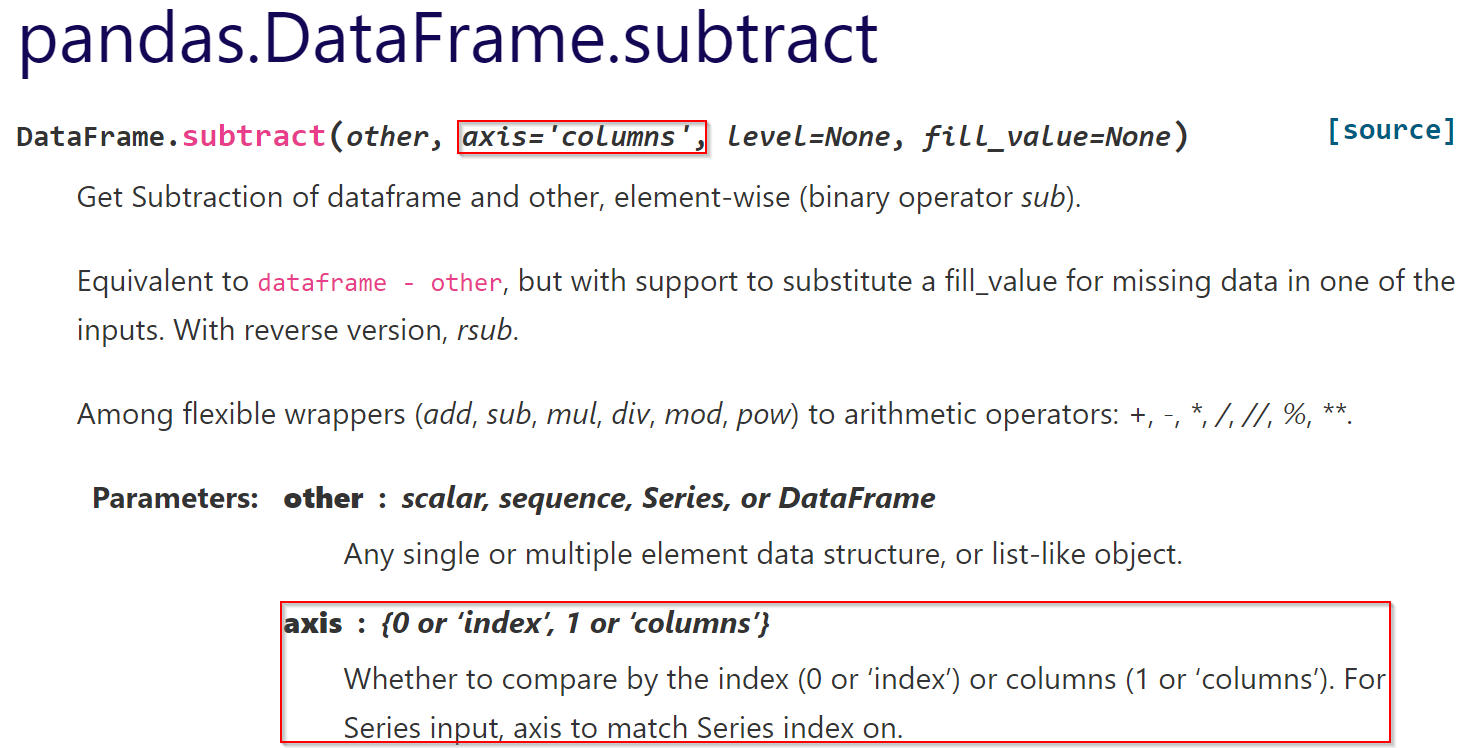
</div>

In [27]:
df = pd.DataFrame(A, columns=list('QRST'))
df

,Q,R,S,T
0,7,7,2,5
1,4,1,7,5
2,1,4,0,9


In [28]:
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-3,-6,5,0
2,-6,-3,-2,4


If you would instead like to operate column-wise, you can use the object methods mentioned earlier, while specifying the `axis` keyword

In [29]:
df.subtract(df['R'], axis = 0)

,Q,R,S,T
0,0,0,-5,-2
1,3,0,6,4
2,-3,0,-4,5


Note that these DataFrame/Series operations, like the operations discussed above, will automatically align indices between the two elements

In [30]:
halfrow = df.iloc[0, ::2]
halfrow

Q    7
S    2
Name: 0, dtype: int32

In [31]:
df

,Q,R,S,T
0,7,7,2,5
1,4,1,7,5
2,1,4,0,9


In [32]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-3.0,NaN,5.0,NaN
2,-6.0,NaN,-2.0,NaN


This preservation and alignment of indices and columns means that operations on data in Pandas will always maintain the data context, which prevents the types of silly errors that might come up when working with heterogeneous and/or misaligned data in raw NumPy arrays

### Handling Missing Data
Pandas treats `None` and `NaN` as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures

- `isnull()`: Generate a boolean mask indicating missing values
- `notnull()`: Opposite of isnull()
- `dropna()`: Return a filtered version of the data
- `fillna()`: Return a copy of the data with missing values filled or imputed

#### Detecting null Values
Pandas data structures have two useful methods for detecting null data: `isnull()` and `notnull()`. Either one will return a Boolean mask over the data.

In [33]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

As mentioned in Data Indexing and Selection section, Boolean masks can be used directly as a `Series` or `DataFrame` index

In [34]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [35]:
data.isnull().sum()

2

#### Dropping null Values
In addition to the masking used before, there are the convenience methods, `dropna()` (which removes NA values) and `fillna()` (which fills in NA values)

In [36]:
data.dropna()

0        1
2    hello
dtype: object

In [37]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a `DataFrame`; we can only drop full rows or full columns. Depending on the application, you might want one or the other, so `dropna()` gives a number of options for a `DataFrame`

By default, `dropna()` will drop all rows in which any null value is present. Alternatively, you can drop NA values along a different axis; `axis = 1` drops all columns containing a null value

In [38]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [39]:
df.dropna(axis = 'columns')

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with all NA values, or a majority of NA values. This can be specified through the `how` or `thresh` parameters, which allow fine control of the number of nulls to allow through.

The default is `how = 'any'`, such that any row or column (depending on the axis keyword) containing a null value will be dropped. You can also specify `how = 'all'`, which will only drop rows/columns that are all null values
<br>

<div>
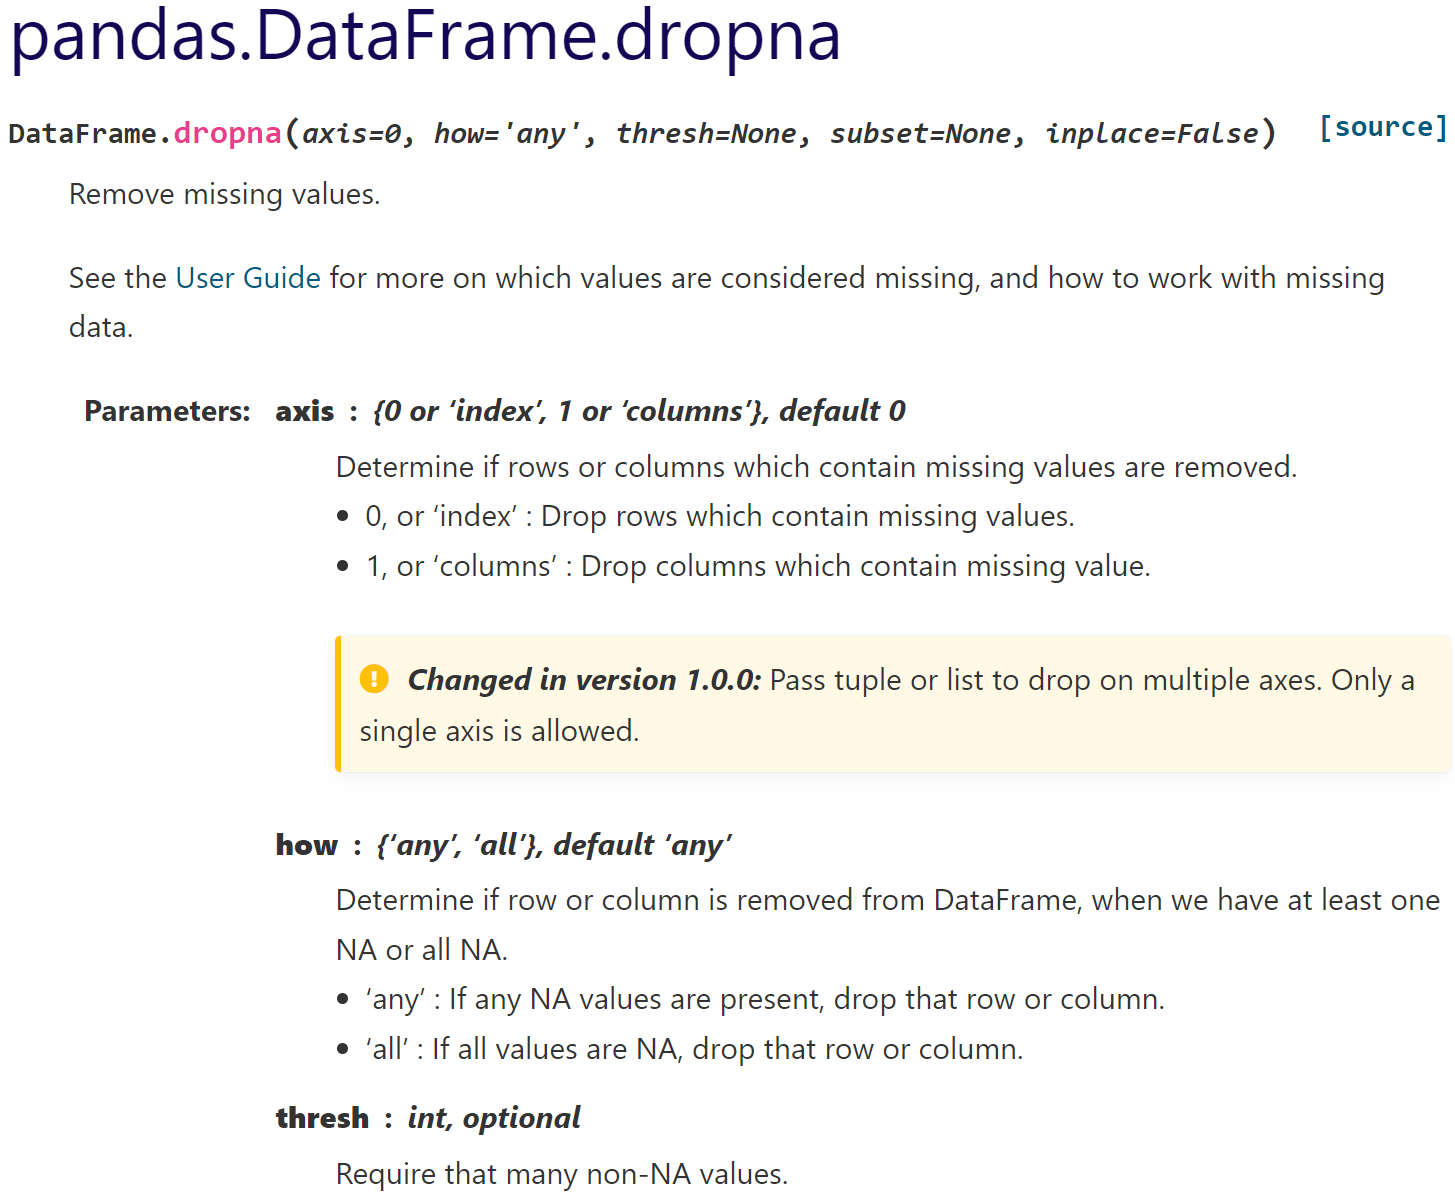
</div>

In [40]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [41]:
df.dropna(axis = 'columns', how = 'all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [42]:
df.dropna(axis = 'rows', thresh = 3)

,0,1,2,3
1,2.0,3.0,5,NaN


#### Filling null Values
Sometimes rather than dropping NA values, you'd rather replace them with a valid value. This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values. You could do this in-place using the `isnull()` method as a mask, but because it is such a common operation Pandas provides the `fillna()` method, which returns **a copy of the array** with the null values replaced

In [43]:
data = pd.Series([1, np.nan, 2, None, 3], index = list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [44]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [45]:
# forward-fill, propagate the previous value forward
data.fillna(method = 'ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [46]:
# back-fill, propagate the next values backward
data.fillna(method = 'bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

For DataFrames, the options are similar, but we can also specify an `axis` along which the fills take place

In [47]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [48]:
df.fillna(0)

,0,1,2,3
0,1.0,0.0,2,0.0
1,2.0,3.0,5,0.0
2,0.0,4.0,6,0.0


In [49]:
df.fillna(method = 'ffill')

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


In [50]:
df.fillna(method = 'ffill', axis = 1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


Notice that if a previous value is not available during a forward fill, the NA value remains. Calling `fillna` with a `dict`, you can use a different fill value for each column

In [51]:
df.fillna({1: 0.3, 3: 0})

,0,1,2,3
0,1.0,0.3,2,0.0
1,2.0,3.0,5,0.0
2,NaN,4.0,6,0.0


`fillna` returns a new object. You can modify the existing DataFrame in-place

In [52]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [53]:
df.fillna({1: 0.3, 3: 0}, inplace = True)

In [54]:
df

,0,1,2,3
0,1.0,0.3,2,0.0
1,2.0,3.0,5,0.0
2,NaN,4.0,6,0.0


### Replacing Values
Filling in missing data with `fillna` method is a special case of more general value replacement.

In [55]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

The -999 values might be sentinel values for missing data. To repace these with NA values that Pandas understands, you can use `replace`, producing a new Series (unless you pass `inplace = True`)

In [56]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

If you want to replace multiple values at once, you instead pass a list and then the substitute value

In [57]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

To use a different replacement for each value, pass a list of substitutes

In [58]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

The argument passed can also be a dict

In [59]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

`replace` method is distinct from `str.replace` which performs string substitution element-wise

### Removing Duplicates
Duplicate rows may be found in a DataFrame for many different reasons. The DataFrame method `dulicated` returns a boolean Series indicating whether each row is a duplicate (has been observed in a previous row) or not

In [60]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [61]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

Relatedly, `drop_duplicates` return a DataFrame where duplicated array is `False`

In [62]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


Both of these methods by default consider all of the columns. Alternatively, you can specify any subset of them to detect duplicates. Suppose we had an additional column of values and wanted to filter duplicates only based on the `k1` column

In [63]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [64]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


### Hierarchical Indexing
Up to this point we've been focused primarily on one-dimensional and two-dimensional data, stored in Pandas `Series` and `DataFrame` objects, respectively. Often it is useful to go beyond this and store higher-dimensional data–that is, data indexed by more than one or two keys. Pandas makes use of hierarchical indexing (also known as multi-indexing) to incorporate multiple index levels within a single index. In this way, higher-dimensional data can be compactly represented within the familiar one-dimensional `Series` and two-dimensional `DataFrame` objects.

In this section, we'll explore the direct creation of `MultiIndex` objects, considerations when indexing, slicing, and computing statistics across multiply indexed data, and useful routines for converting between simple and hierarchically indexed representations of your data

### A Multiply Indexed Series
Let's start by considering how we might represent two-dimensional data within a one-dimensional `Series`

#### A Naive Way
Suppose you would like to track data about states from two different years. Using the Pandas tools we've already covered, you might be tempted to simply use Python tuples as keys

In [65]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index = index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

With this indexing scheme, you can straightforwardly index or slice the series based on this multiple index

In [66]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

But the convenience ends there. For example, if you need to select all values from 2010, you'll need to do some messy (and potentially slow) munging to make it happen

In [67]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

#### The Better Way: Pandas `MultiIndex`
Fortunately, Pandas provides a better way. Our tuple-based indexing is essentially a rudimentary multi-index, and the Pandas `MultiIndex` type gives us the type of operations we wish to have. Hierarchial indexing plays an important role in reshaping data and group-based operation like forming a pivot table. We can create a `MultiIndex` from the tuples as follows

In [68]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [69]:
index1 = pd.MultiIndex.from_product([['Texas', 'New York', 'California'], [2010, 2000]], 
                                    names = ['state', 'year'])
index1

MultiIndex([(     'Texas', 2010),
            (     'Texas', 2000),
            (  'New York', 2010),
            (  'New York', 2000),
            ('California', 2010),
            ('California', 2000)],
           names=['state', 'year'])

Notice that the `MultiIndex` contains multiple levels of indexing - in this case, the state names and the years, as well as multiple labels for each data point which encode these levels.

If we re-index our series with this `MultiIndex`, we see the hierarchical representation of the data

**Syntax**

`DataFrame.reindex(labels=None, index=None, columns=None, axis=None, method=None, copy=True, level=None, fill_value=nan, limit=None, tolerance=None)`

**Calling Conventions**

`reindex(index=index_labels, columns=column_labels, ...)`

Conform Series/DataFrame to new index with optional filling logic. Places NA/NaN in locations having no value in the previous index. A new object is produced unless the new index is equivalent to the current one and `copy=False`

In [70]:
pop = pop.reindex(index1)
pop

state       year
Texas       2010    25145561
            2000    20851820
New York    2010    19378102
            2000    18976457
California  2010    37253956
            2000    33871648
dtype: int64

Here the first two columns of the `Series` representation show the multiple index values, while the third column shows the data. Notice that some entries are missing in the first column: in this multi-index representation, any blank entry indicates the same value as the line above it.

Now to access all data for which the first index is Texas

In [71]:
# partial indexing
pop['Texas']

year
2010    25145561
2000    20851820
dtype: int64

In [72]:
pop.loc['Texas']

year
2010    25145561
2000    20851820
dtype: int64

Let's access populuation for Texas at year 2010

In [73]:
pop[('Texas', 2010)]

25145561

Now to access all data for which the second index is 2010, we can simply use the Pandas slicing notation

In [74]:
# selection is even possible from an inner level
# this format only works for Series
pop[:, 2010]

state
Texas         25145561
New York      19378102
California    37253956
dtype: int64

The result is a singly indexed array with just the keys we're interested in

#### MultiIndex As Extra Dimension
You might notice something else here: we could easily have stored the same data using a simple `DataFrame` with index and column labels. In fact, Pandas is built with this equivalence in mind. The `unstack()` method will quickly convert a multiply indexed Series into a conventionally indexed `DataFrame`. 

#### `stack()` and `unstack()`
`stack()` and `unstack()` methods available on `Series` and `DataFrame`. These methods are designed to work together with `MultiIndex` objects.

- `stack()`: “pivot” a level of the (possibly hierarchical) column labels, returning a DataFrame with an index with a new inner-most level of row labels. (i.e., convert columns into rows)
- `unstack()`: (inverse operation of stack) “pivot” a level of the (possibly hierarchical) row index to the column axis, producing a reshaped DataFrame with a new inner-most level of column labels. (i.e., convert rows into columns)

<div>
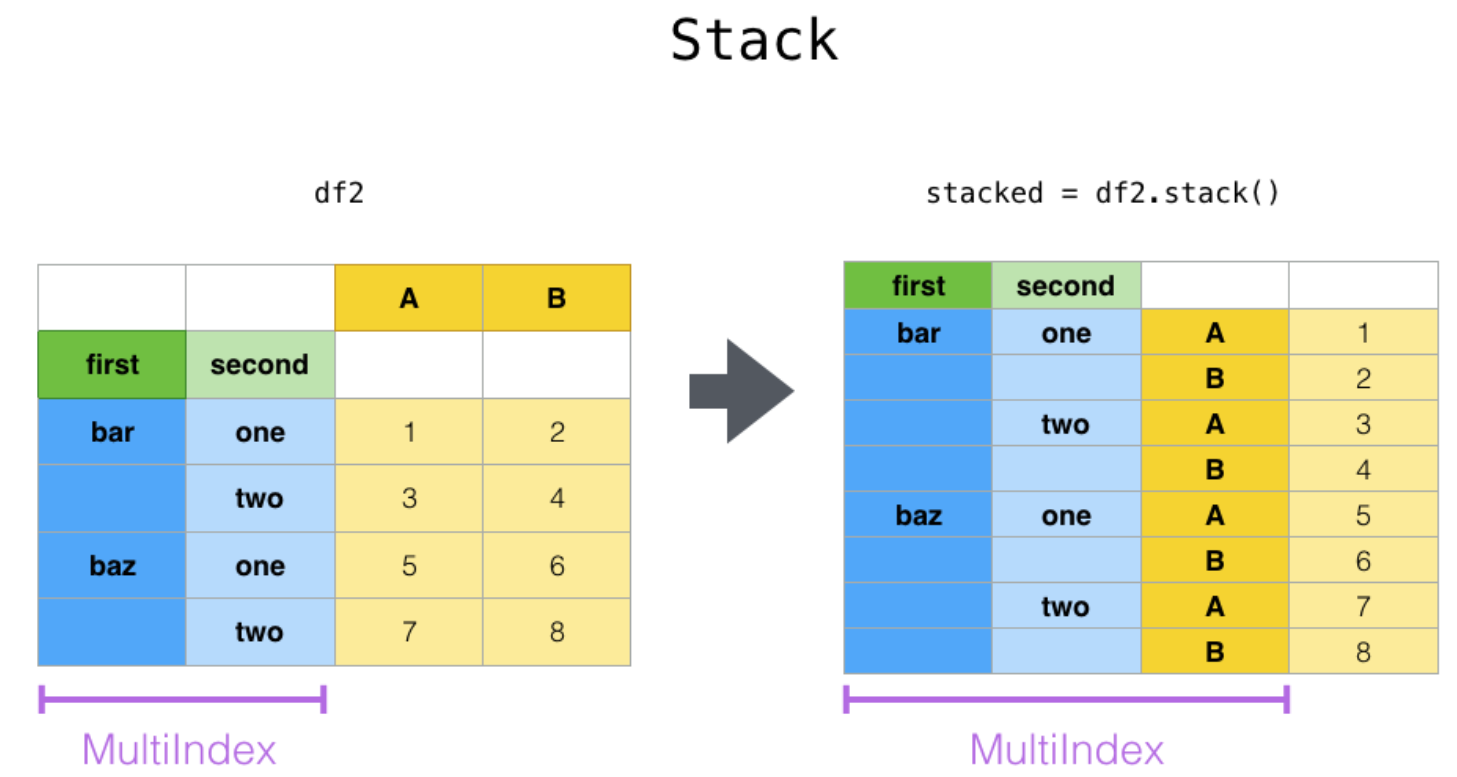
</div>

The stack function “compresses” a level in the DataFrame’s columns to produce either:

- A `Series`, in the case of a simple column Index
- A `DataFrame`, in the case of a MultiIndex in the columns

If the columns have a `MultiIndex`, you can choose which level to stack. The stacked level becomes the new lowest level in a `MultiIndex` on the columns

With a “stacked” `DataFrame` or `Series` (having a `MultiIndex` as the index), the inverse operation of stack is `unstack()`, which by default unstacks the **last level**


<div>
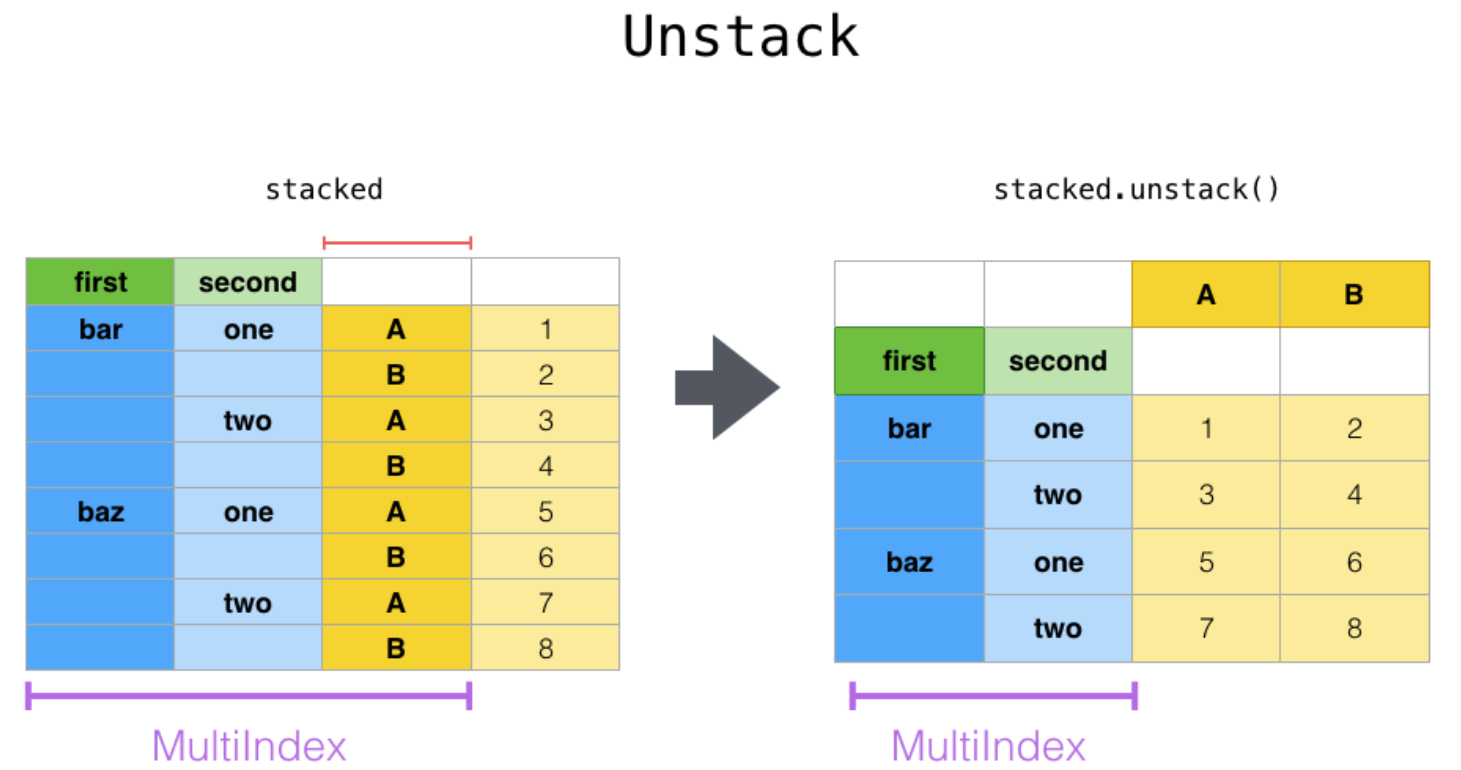
</div>

<div>
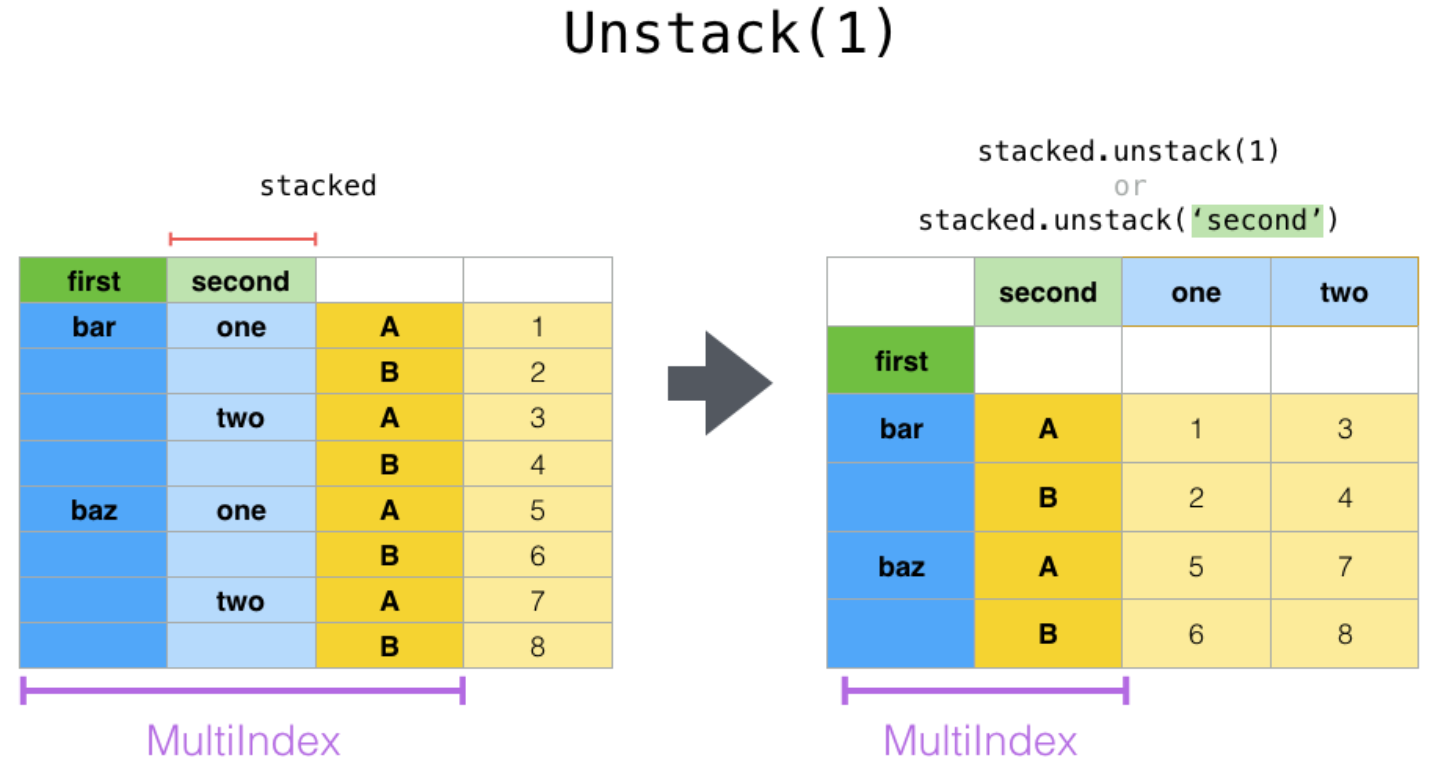
</div>

<div>
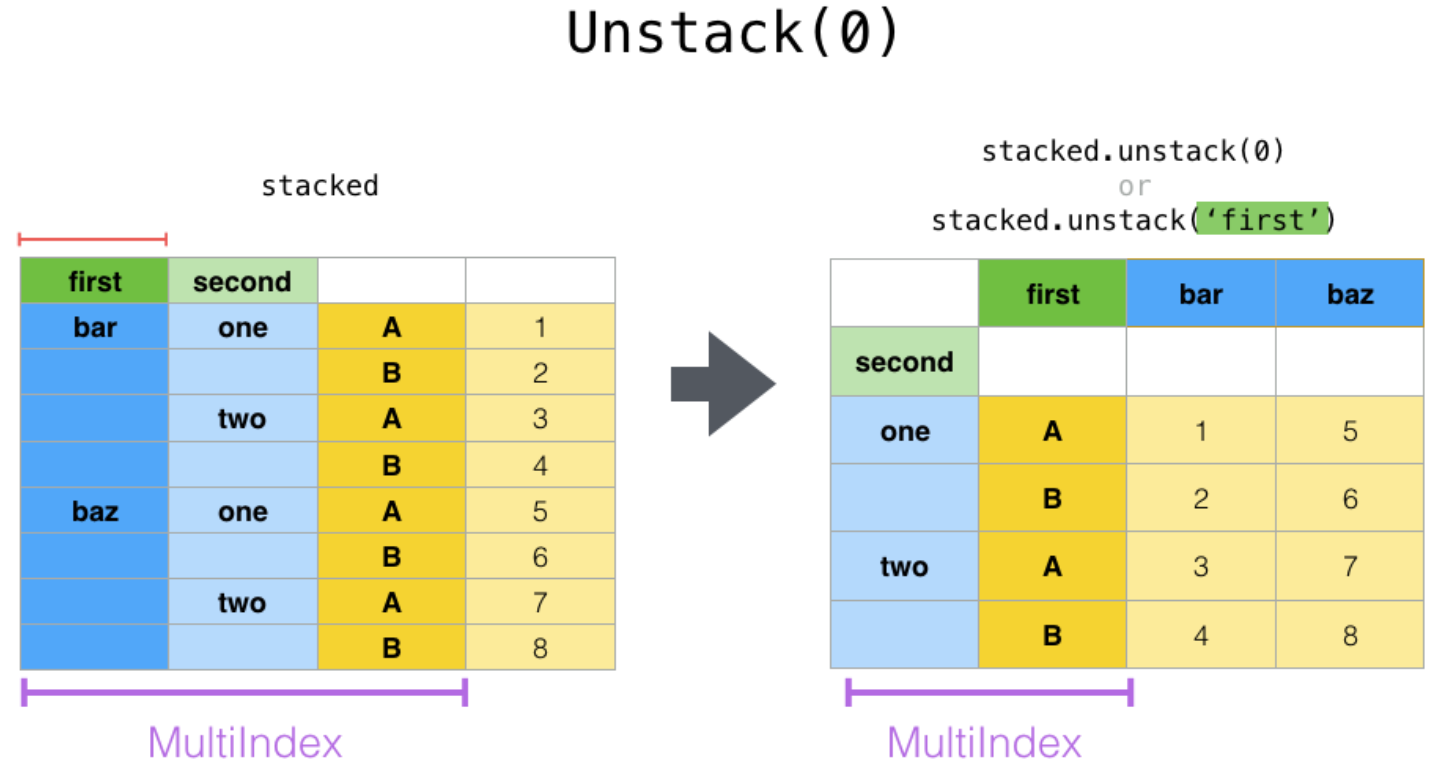
</div>

Notice that the stack and unstack methods implicitly sort the index levels involved. Hence a call to `stack()` and then `unstack()`, or vice versa, will result in a sorted copy of the original `DataFrame` or `Series`

In [75]:
pop

state       year
Texas       2010    25145561
            2000    20851820
New York    2010    19378102
            2000    18976457
California  2010    37253956
            2000    33871648
dtype: int64

In [76]:
# indices are sorted after calling unstack
pop_df = pop.unstack()
pop_df

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [77]:
pop_df.stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

To summarize

+ `stack`: it pivots from columns in the data to the rows. For single index, the result will be a `Series`. For multi-index, the result will be a `DataFrame`
+ `unstack`: it pivots from the rows into the columns

We can use multi-indexing to represent two-dimensional data within a one-dimensional `Series`, we can also use it to represent data of three or more dimensions in a `Series` or `DataFrame`. Each extra level in a multi-index represents an extra dimension of data; taking advantage of this property gives us much more flexibility in the types of data we can represent.

we might want to add another column of demographic data for each state at each year (say, population under 18) ; with a `MultiIndex` this is as easy as adding another column to the `DataFrame`

In [78]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
state      year                   
Texas      2010  25145561  9267089
           2000  20851820  9284094
New York   2010  19378102  4687374
           2000  18976457  4318033
California 2010  37253956  5906301
           2000  33871648  6879014

In addition, all the ufuncs and other functionality in Pandas work with hierarchical indices as well. Here we compute the fraction of people under 18 by year, given the above data

In [79]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18

state       year
Texas       2010    0.368538
            2000    0.445241
New York    2010    0.241890
            2000    0.227547
California  2010    0.158542
            2000    0.203091
dtype: float64

In [80]:
f_u18.unstack()

year,2000,2010
state,,
California,0.203091,0.158542
New York,0.227547,0.241890
Texas,0.445241,0.368538


### Pivoting "long" to "Wide" Format
A common way to store multiple time series in databases and CSV is in so-called long or stacked format.

<div>
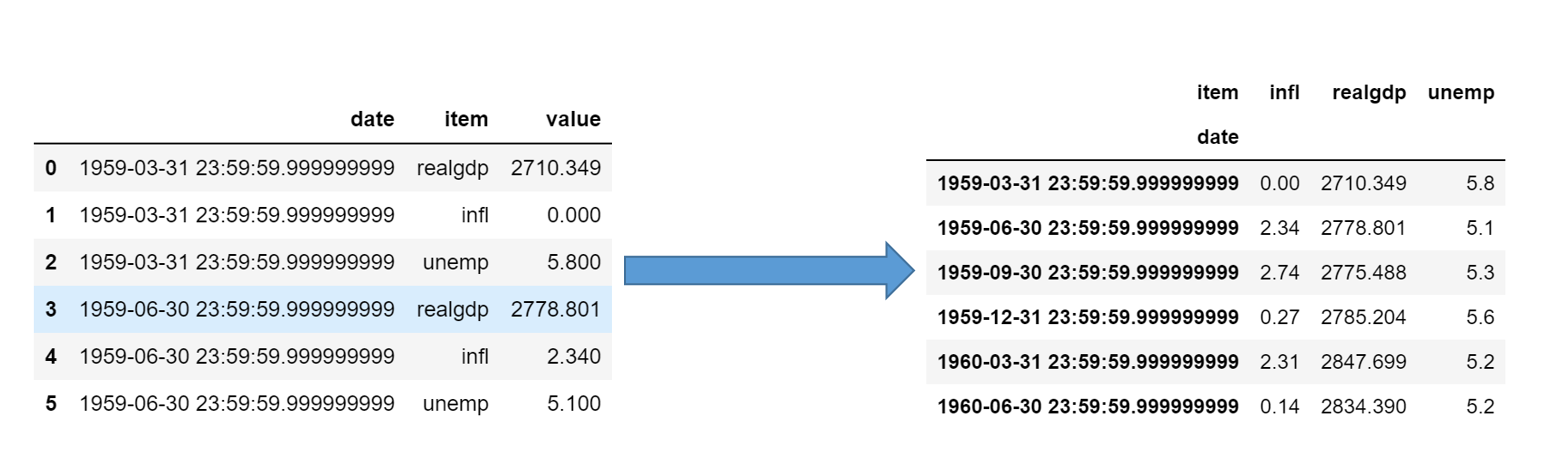
</div>

In [81]:
data = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [82]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name = 'item')
ndata = data.reindex(columns = columns)
ndata.head()

item,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2


In [83]:
periods = pd.PeriodIndex(year = data.year, quarter = data.quarter,
                         name = 'date')
ndata.index = periods.to_timestamp('D', 'end')
ndata.head()

item,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2


In [84]:
ldata = ndata.stack()
ldata

date                           item   
1959-03-31 23:59:59.999999999  realgdp     2710.349
                               infl           0.000
                               unemp          5.800
1959-06-30 23:59:59.999999999  realgdp     2778.801
                               infl           2.340
                                            ...    
2009-06-30 23:59:59.999999999  infl           3.370
                               unemp          9.200
2009-09-30 23:59:59.999999999  realgdp    12990.341
                               infl           3.560
                               unemp          9.600
Length: 609, dtype: float64

In [85]:
ldata = ndata.stack().reset_index()
ldata.head()

,date,item,0
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340


In [86]:
ldata = ndata.stack().reset_index().rename(columns = {0: 'value'})
ldata.head(6)

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100


In [87]:
# a different approach without using rename
ldata = ndata.stack().reset_index(name = 'value')
ldata.head()

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340


This is so-called long format for multiple time series, or other observational data with two or more keys(here, our keys are date and item). Each row in the table represents a single observation. In some cases, the data may be more difficult to work with in this format. You might prefer to have a `DataFrame` containing one column per distinct `item` value indexed by the timestamps in the `date` column. You can use `DataFrame` `pivot` method to achieve it. It transforms one column into many columns in a new DataFrame

In [88]:
pivoted = ldata.pivot(index = 'date', columns = 'item', values = 'value')
pivoted.head(6)

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
1960-06-30 23:59:59.999999999,0.14,2834.390,5.2


The first two values passed are the columns to be used respectively as the row and column index, then finally an optional value column to fill the DataFrame. Suppose you had two value columns that you wanted to reshape simultanenously

In [89]:
ldata['value2'] = np.random.randn(len(ldata))
ldata.head()

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.363383
1,1959-03-31 23:59:59.999999999,infl,0.000,-0.799153
2,1959-03-31 23:59:59.999999999,unemp,5.800,0.020710
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,-0.810380
4,1959-06-30 23:59:59.999999999,infl,2.340,-0.108594


By omitting the last argument, you obtain a DataFrame with hierarchical columns

In [90]:
pivoted = ldata.pivot(index = 'date', columns = 'item')
pivoted.head()

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.799153 -0.363383   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -0.108594 -0.810380   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.179230  0.840975   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -1.260141  0.175587   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  0.370042  0.316466   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.020710  
1959-06-30 23:59:59.999999999 -0.506832  
1959-09-30 23:59:59.999999999 -0.745994  
1959-12-31 23:59:59.999999999  0.689203  
1960-03-31 23:59:59.999999999  0.851781

Note that `pivot` is equivalent to creating a hierarchical index using `set_index` followed by a call to `unstack`

In [91]:
ldata.set_index(['date', 'item'])

value    value2
date                          item                        
1959-03-31 23:59:59.999999999 realgdp   2710.349 -0.363383
                              infl         0.000 -0.799153
                              unemp        5.800  0.020710
1959-06-30 23:59:59.999999999 realgdp   2778.801 -0.810380
                              infl         2.340 -0.108594
...                                          ...       ...
2009-06-30 23:59:59.999999999 infl         3.370  1.267458
                              unemp        9.200 -1.064425
2009-09-30 23:59:59.999999999 realgdp  12990.341 -1.304236
                              infl         3.560  0.216812
                              unemp        9.600 -0.071682

[609 rows x 2 columns]

In [92]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked.head()

value                    value2            \
item                           infl   realgdp unemp      infl   realgdp   
date                                                                      
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8 -0.799153 -0.363383   
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1 -0.108594 -0.810380   
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3  0.179230  0.840975   
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6 -1.260141  0.175587   
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2  0.370042  0.316466   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999  0.020710  
1959-06-30 23:59:59.999999999 -0.506832  
1959-09-30 23:59:59.999999999 -0.745994  
1959-12-31 23:59:59.999999999  0.689203  
1960-03-31 23:59:59.999999999  0.851781

### Methods of MultiIndex Creation
The most straightforward way to construct a multiply indexed `Series` or `DataFrame` is to simply pass a list of two or more index arrays to the constructor

In [93]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns = ['data1', 'data2'])
df

data1     data2
a 1  0.299574  0.410198
  2  0.070286  0.893607
b 1  0.689064  0.358185
  2  0.270626  0.002868

Similarly, if you pass a `dictionary` with appropriate `tuples` as keys, Pandas will automatically recognize this and use a `MultiIndex` by default

#### Explicit MultiIndex Constructors
For more flexibility in how the index is constructed, you can instead use the class method constructors available in the `pd.MultiIndex`. For example, as we did before, you can construct the `MultiIndex` from a simple list of arrays giving the index values within each level

In [94]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

You can construct it from a list of tuples giving the multiple index values of each point

In [95]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

You can even  constructthe multiple index from a Cartesian product of single indices

In [96]:
# recommended way to generate multiple index
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Similarly, you can construct the `MultiIndex` directly using its internal encoding by passing `levels` (a list of lists containing available index values for each level) and `labels` (a list of lists that reference these labels)

In [97]:
pd.MultiIndex(levels = [['a', 'b'], [1, 2]],
              labels = [[0, 0, 1, 1], [0, 1, 0, 1]])

TypeError: __new__() got an unexpected keyword argument 'labels'

Any of these objects can be passed as the index argument when creating a `Series` or `Dataframe`, or be passed to the reindex method of an existing `Series` or `DataFrame`

#### MultiIndex Level Names
Sometimes it is convenient to name the levels of the `MultiIndex`. This can be accomplished by passing the names argument to any of the above `MultiIndex` constructors, or by setting the `names` attribute of the index after the fact:

In [ ]:
pop.index.names = ['state', 'year']
pop

#### MultiIndex for Columns
In a DataFrame, the rows and columns are completely symmetric, and just as the rows can have multiple levels of indices, the columns can have multiple levels as well.

In [ ]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014, 2015, 2016], [1, 2, 3]],
                                   names = ['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names = ['subject', 'type'])

# mock some data
data = np.round(np.random.randn(12, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index = index, columns = columns)
health_data

Here we see where the multi-indexing for both rows and columns can come in very handy. This is fundamentally four-dimensional data, where the dimensions are the subject, the measurement type, the year, and the visit number. With this in place we can, for example, index the top-level column by the person's name and get a full DataFrame containing just that person's information

In [ ]:
health_data['Guido']

### Indexing and Slicing a MultiIndex
Indexing and slicing on a `MultiIndex` is designed to be intuitive, and it helps if you think about the indices as added dimensions. We'll first look at indexing multiply indexed `Series`, and then multiply-indexed DataFrames.

Getting values from an object with multi-axes selection uses the following notation (using `loc` as an example, but the following applies to `iloc` as well). Any of the axes accessors may be the null slice `:`. Axes left out of the specification are assumed to be `:`, e.g. `p.loc['a']` is equivalent to `p.loc['a', :, :]`
        
<div>
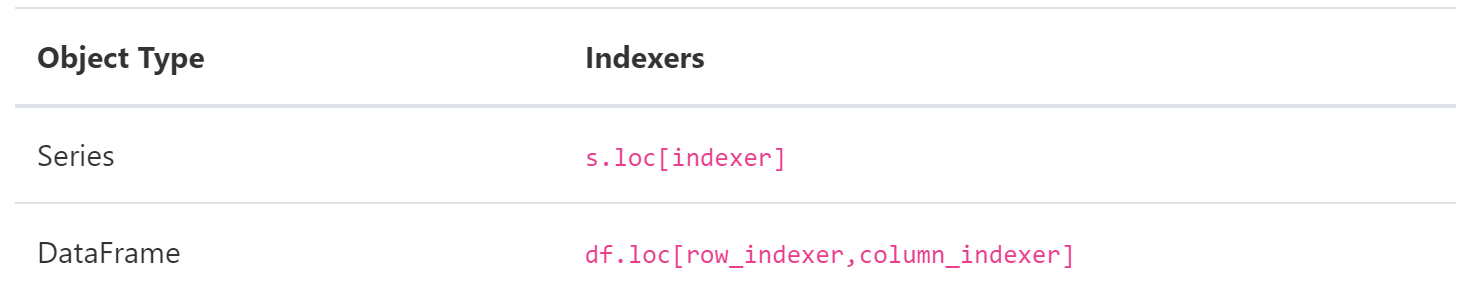
</div>

#### Multiply Indexed Series
We can access single elements by indexing with multiple terms

In [ ]:
pop

In [ ]:
pop['California', 2000]

The `MultiIndex` also supports **partial indexing**, or indexing just one of the levels in the index. The result is another `Series`, with the lower-level indices maintained

In [ ]:
pop['California']

In [ ]:
pop[2010]

**Partial slicing** is available as well, **as long as the `MultiIndex` is sorted**

In [ ]:
pop.loc['California':'New York']

With sorted indices, partial indexing can be performed on lower levels by passing an empty slice `(:)` in the first index

In [ ]:
# this format only works for Series
pop[:, 2010]

Other types of indexing and selection work as well; for example, selection based on Boolean masks

In [ ]:
pop[pop > 22000000]

Selection based on fancy indexing also works

In [ ]:
pop[['California', 'Texas']]

#### Multiply Indexed DataFrames
A multiply indexed DataFrame behaves in a similar manner.

In [ ]:
health_data

**Remember that columns are primary in a `DataFrame`**, and the syntax used for multiply indexed `Series` applies to the columns. For example, we can recover Guido's heart rate data with a simple operation

In [ ]:
health_data['Guido', 'HR']

Also, as with the single-index case, we can use the `loc` and `iloc` indexers

In [ ]:
#preferred way
health_data.loc[:, ('Guido', 'HR')]

In [ ]:
health_data.iloc[:2, :2]

These indexers provide an array-like view of the underlying two-dimensional data, but each individual index in `loc` or `iloc` can be passed a tuple of multiple indices.

`Tuple` is intepreted as a multi-level key while `list` is used to specify several keys

In [ ]:
health_data.loc[2013]

In [ ]:
health_data.loc[(2013, 1)]

In [ ]:
health_data.loc[2013, 1]

In [ ]:
health_data.loc[[(2013, 1)]]

In [ ]:
health_data.loc[(2013, 1), :]

In [ ]:
health_data.loc[(2013, 1), 'Bob']

In [ ]:
health_data.loc[(2013, 1):2016]

In [ ]:
health_data.loc[[2013, 2016], :]

In [ ]:
health_data.loc[([2013, 2016], 1), :]

In [ ]:
health_data.loc[([2013, 2016], 1), 'Bob']

In [ ]:
health_data.loc[(2013, [1, 3]), :]

In [ ]:
health_data.loc[(2013, [1, 3]), 'Bob']

Working with slices within these index tuples is not especially convenient; trying to create a slice within a `tuple` will lead to a syntax error. For example, to get the first visit for all patients' HR

In [ ]:
health_data.loc[(:, 1), (:, 'HR')]

You could get around this by building the disired slice explicitly using Python's built-in `slice()` function. `slice(None)` represents to select all the contents from the index at this level 

In [ ]:
health_data.loc[(slice(None), 1), (slice(None), 'HR')]

We can also use an `IndexSlice` object instead

In [ ]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

#### Another Useful Method `xs()`
`xs()` return cross-section from the `Series` or `DataFrame`. This method takes a key argument to select data at a particular level of a `MultiIndex`. `xs()` can not be used to set values

**Syntax**

`DataFrame.xs(key, axis=0, level=None, drop_level=True)`

- key: label or tuple of label. Label contained in the index, or partially in a `MultiIndex`
- axis: `{0 or ‘index’, 1 or ‘columns’}`, default 0. Axis to retrieve cross-section on
- level: `object`, defaults to first n levels (`n = 1` or `len(key)`). In case of a key partially contained in a `MultiIndex`, indicate which levels are used. Levels can be referred by label or position
- drop_level: `bool`, default `True`. If `False`, returns object with same levels as self

In [ ]:
d = {'num_legs': [4, 4, 2, 2],
     'num_wings': [0, 0, 2, 2],
     'class': ['mammal', 'mammal', 'mammal', 'bird'],
     'animal': ['cat', 'dog', 'bat', 'penguin'],
     'locomotion': ['walks', 'walks', 'flies', 'walks']}
df = pd.DataFrame(data = d)
df = df.set_index(['class', 'animal', 'locomotion'])
df

In [ ]:
# Get values at specified index
df.xs('mammal')

In [ ]:
# Get values at several indexes
df.xs(('mammal', 'dog'))

In [ ]:
# Get values at specified index and level
df.xs('cat', level = 1)

In [ ]:
# Get values at several indexes and levels
df.xs(('bird', 'walks'), level = [0, 'locomotion'])

In [ ]:
# Get values at specified column and axis
df.xs('num_wings', axis = 1)

### Rearranging Multi-Indices
One of the keys to working with multiply indexed data is knowing how to effectively transform the data. There are a number of operations that will preserve all the information in the dataset, but rearrange it for the purposes of various computations. We saw a brief example of this in the `stack()` and `unstack()` methods, but there are many more ways to finely control the rearrangement of data between hierarchical indices and columns.

#### Sorted and Unsorted Indices
Many of the `MultiIndex` slicing operations will fail if the index is not sorted

In [ ]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index = index)
data.index.names = ['char', 'int']
data

In [ ]:
data['a':'b']

For various reasons, **partial slices** and other similar operations require the levels in the MultiIndex to be in sorted (i.e., lexographical) order. Pandas provides a number of convenience routines to perform this type of sorting; examples are the `sort_index()` and `sortlevel()` methods of the `DataFrame`

In [ ]:
data = data.sort_index()
data

In [ ]:
data['a':'b']

### Reordering and Sorting Levels
At times you will need to rearrange the order of the levels on an axis or sort the data by values in one specific level. The `swaplevel` method takes two level numbers or names and returns a new object with levels interchanged (the data is otherwise unaltered)

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

The hierarchial levels can have names. If so, these will show up in the console output

In [ ]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

In [ ]:
frame.swaplevel('key1', 'key2')

`sort_index` sorts the data using only the values in a single level. When swapping levels, it is common to also use `sort_index` so that the result is lexicographically sorted by the indicated level

In [ ]:
frame.sort_index(level = 1)

In [ ]:
frame.swaplevel(0, 1).sort_index(level = 0)

Data selection performance is much better on hierarchically indexed objects if the index is lexicographically sorted with the outmost level - that is , the result of calling `sort_index(level = 0)` or `sort_index()`

### Summary Statistics by Level
Many descriptive and summary statistics on `DataFrame` and `Series` have a `level` option in which you can specify the level you want to aggregate by on a particular axis

In [ ]:
frame

In [ ]:
frame.sum(level = 'key2')

In [ ]:
frame.sum(level = 'color', axis = 1)

#### Stacking and Unstacking Indices
It is possible to convert a dataset from a stacked multi-index to a simple two-dimensional representation, optionally specifying the level to use

In [ ]:
pop

In [ ]:
pop.unstack(level = 0)

In [ ]:
pop.unstack(level = 1)

#### Index Setting and Resetting
Another way to rearrange hierarchical data is to turn the index labels into columns; this can be accomplished with the `reset_index()` method. Calling this on the population dictionary will result in a `DataFrame` with a state and year column holding the information that was formerly in the index. For clarity, we can optionally specify the name of the data for the column representation

In [ ]:
pop_flat = pop.reset_index(name='population')
pop_flat

When we reset the index, the old index is added as a column, and a new sequential index is used. We can use the `drop` parameter to avoid the old index being added as a column

In [ ]:
pop_flat1 = pop.reset_index(name='population', drop = True)
pop_flat1

Often when working with data in the real world, the raw input data looks like this and it's useful to build a MultiIndex from the column values. This can be done with the `set_index()` method of the `DataFrame`, which returns a multiply indexed `DataFrame`

In [ ]:
pop_flat.set_index(['state', 'year'])

### Data Aggregations on Multi-Indices
We've previously seen that Pandas has built-in data aggregation methods, such as `mean()`, `sum()`, and `max()`. For hierarchically indexed data, these can be passed a `level` parameter that controls which subset of the data the aggregate is computed on

In [ ]:
health_data

Perhaps we'd like to average-out the measurements in the two visits each year. We can do this by naming the index level we'd like to explore, in this case the year

In [ ]:
data_mean = health_data.mean(level = 'year')
data_mean

By further making use of the `axis` keyword, we can take the mean among levels on the columns as well

In [ ]:
data_mean.mean(axis = 1, level = 'type')

### Discretization and Binning
Continuous data is often discretized or otherwise separated into bins for analysis. Suppose you have data about a group of people in a study, you want to group them into discrete age buckets

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Let's divide these into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older. To do so, you have to use `cut`, a function in Pandas

In [ ]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

The object Pandas returns is a special `Categorical` object. The output you see describes the bins computed by `pd.cut`. You can treat it like an array of strings indicating the bin name. Note that `pd.value_counts(cats)` are the bin counts for the result of `pd.cut`

In [ ]:
pd.value_counts(cats)

Consistent with mathematical notation for interval, you can change which side is closed by passing `right = False`

In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right = False)

You can aslo pass your own bin names by passing a list or array to the `labels` option

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels = group_names)

If you pass an integer number of bins to `cut` instead of explicit bin edges, it will compute equal-length bins based on the minimum and maximum values in the data

In [ ]:
data = np.random.rand(20)
pd.cut(data, 4, precision = 2) # precision = 2 option limits the decimal precision to two digits

A closely related function, `qcut`, bins the data based on sample quantiles. Depending on the distribution of the data, using `cut` will not usually result in each bin having the same number of data points. Since `qcut` use sample quantiles instead, by definition you will obtain roughly equal-size bins

In [ ]:
data = np.random.randn(1000)  # Normally distributed
cats = pd.qcut(data, 4)  # Cut into quartiles
cats

In [ ]:
pd.value_counts(cats)

Similar to `cut`, you can pass your own quantiles (numbers between 0 and 1, inclusive)

In [ ]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])